In [218]:
import math
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return np.sin(x) + np.sin(3 * x)


def h(x):
    B = 2.8
    return 2 * B * np.sinc(B * x / np.pi) # / 2 / np.pi


def gauss(x):
    sigma = 0.3
    return 1 / sigma / math.sqrt(2 * math.pi) * np.exp(-x ** 2 / (2 * sigma**2))


def plot(func, start, end):
    x = np.linspace(start, end, 1000)
    plt.plot(x, func(x))

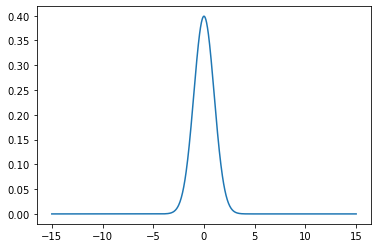

In [211]:
plot(gauss, -15, 15)

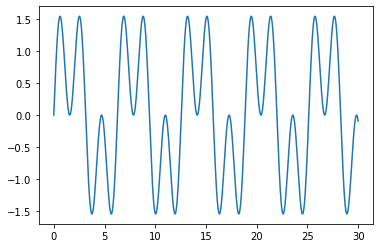

In [212]:
plot(f, 0, 30)

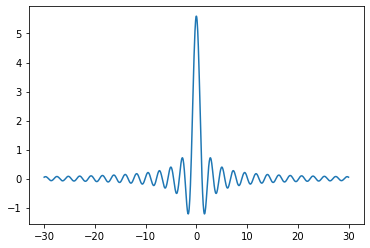

In [134]:
plot(h, -30, 30)

In [135]:
step = 0.005
u = np.arange(-20, 20, step)
x = np.arange(0, 50, step)
kernel = h(u)
kernel *= step
kernel /= 2 * np.pi
print(np.sum(kernel))
g = np.convolve(f(x), kernel, mode='same')
print(g.shape)

0.9904124126352041
(10000,)


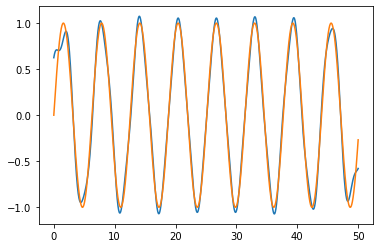

In [136]:
plt.plot(x, g)
plt.plot(x, np.sin(x))

In [222]:
step = 0.1
x = np.arange(-15, 15.01, step)
vals = gauss(x)
vals *= step
print(gauss(1))
print(np.sum(vals))

0.005140929987637022
1.0000000000000036


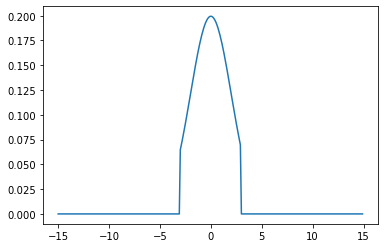

In [207]:
from numpy import fft

x = np.arange(-15, 15, 0.1)
y = gauss(x)
y[:120] = 0
y[-120:] = 0

plt.plot(x, y)

(300,) (300,)
[ 0.06666667 -0.03333333  0.03333333  0.        ] [ 7.0972505 +0.06158928j -8.25097832+0.03806427j -8.25097832-0.03806427j
  8.66304646+0.j        ]


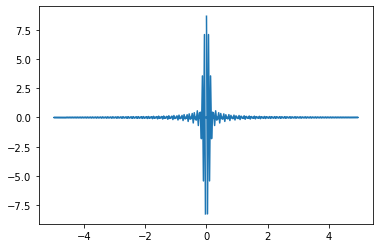

In [208]:
N = len(x)
freqs = fft.fftfreq(300, 0.1)
vals = fft.fft(y)
print(vals.shape, freqs.shape)
plt.plot(freqs, vals.real)

vals_abs = np.abs(vals)
ind = np.argpartition(vals_abs, -4)[-4:]
print(freqs[ind], vals[ind])

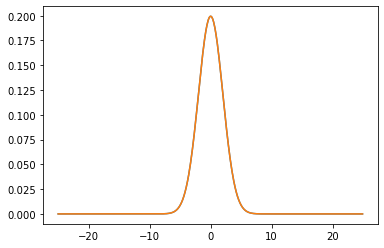

In [197]:
new_y = fft.ifft(vals)
plt.plot(x, new_y.real)
plt.plot(x, y)